<a href="https://colab.research.google.com/github/brian3073456/opencv/blob/master/Copy_of_Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/brian3073456/opencv/master/lena512g.bmp

--2020-04-30 11:08:30--  https://raw.githubusercontent.com/brian3073456/opencv/master/lena512g.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263222 (257K) [image/bmp]
Saving to: ‘lena512g.bmp’

lena512g.bmp        100%[===================>] 257.05K  --.-KB/s    in 0.05s   

2020-04-30 11:08:31 (5.03 MB/s) - ‘lena512g.bmp’ saved [263222/263222]



In [0]:
!wget https://raw.githubusercontent.com/brian3073456/opencv/master/temp.bmp

--2020-04-30 11:09:34--  https://raw.githubusercontent.com/brian3073456/opencv/master/temp.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32054 (31K) [image/bmp]
Saving to: ‘temp.bmp’

temp.bmp            100%[===================>]  31.30K  --.-KB/s    in 0.01s   

2020-04-30 11:09:35 (2.49 MB/s) - ‘temp.bmp’ saved [32054/32054]



In [0]:
!wget https://raw.githubusercontent.com/brian3073456/opencv/master/lena4.bmp

--2020-04-30 11:33:15--  https://raw.githubusercontent.com/brian3073456/opencv/master/lena4.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1512054 (1.4M) [image/bmp]
Saving to: ‘lena4.bmp’

lena4.bmp           100%[===================>]   1.44M  --.-KB/s    in 0.1s    

2020-04-30 11:33:15 (14.1 MB/s) - ‘lena4.bmp’ saved [1512054/1512054]



In [0]:
!wget https://raw.githubusercontent.com/brian3073456/opencv/master/lena4Temp.bmp

--2020-04-30 11:33:16--  https://raw.githubusercontent.com/brian3073456/opencv/master/lena4Temp.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21066 (21K) [image/bmp]
Saving to: ‘lena4Temp.bmp’

lena4Temp.bmp       100%[===================>]  20.57K  --.-KB/s    in 0.01s   

2020-04-30 11:33:17 (1.67 MB/s) - ‘lena4Temp.bmp’ saved [21066/21066]



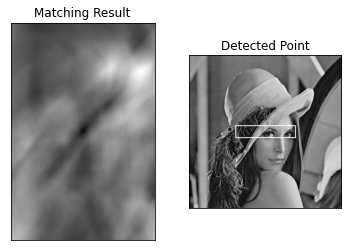

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena512g.bmp',0)
img2 = img.copy()
template = cv2.imread('temp.bmp',0)
th, tw = template.shape[::]
img = img2.copy()
rv = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv)
topLeft = minLoc
bottomRight = (topLeft[0] + tw, topLeft[1] + th)
cv2.rectangle(img,topLeft, bottomRight, 255, 2)
plt.subplot(121),plt.imshow(rv,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

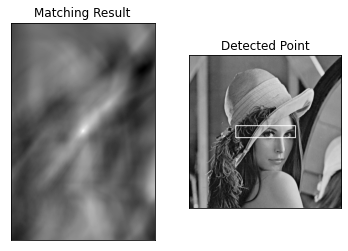

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena512g.bmp',0)
img2 = img.copy()
template = cv2.imread('temp.bmp',0)
tw, th = template.shape[::-1]
img = img2.copy()
rv = cv2.matchTemplate(img,template,cv2.TM_CCOEFF)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv)
topLeft = maxLoc
bottomRight = (topLeft[0] + tw, topLeft[1] + th)
cv2.rectangle(img,topLeft, bottomRight, 255, 2)
plt.subplot(121),plt.imshow(rv,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

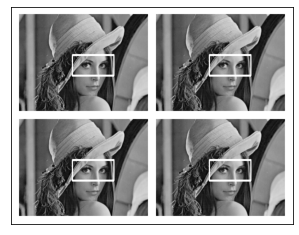

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena4.bmp',0)
template = cv2.imread('lena4Temp.bmp',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.9
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), 255, 1)
plt.imshow(img,cmap = 'gray')
plt.xticks([]), plt.yticks([])